# Convolutional Neural Network.
## Instructions and Requirements:
This week workshop will have two sections:

*   Section: 1
  *   In this section, we will implement and observe the operations of various layers used to build the CNN.
  *   By the end of the workshop, we expect you to be able to:
      1.   Explain the Convolution operation
      2.   Explain the pooling operation
      3.   Get familiar with various hyperparameters i.e. stride, padding

*   Section: 2
  *   In this section we will compile all the learning from section 1 to build a basic Convolutional Neural Network using Keras and Tensorflow.
  

##Convolution Summary:

We convolve (slide) a small matrix also known as Filter/kernel, performing element wise matrix multiplications to produce filter-map.

  *   Objective of a convolution operations:
        1.   Apply a set of weights-a filter- to extract local features.
        2.   Use Multiple filters to extract different features.
        3.   Spatially share parameters of each filter.

Mathematically it perform following:
$$ conv(I,K)_{xy} = ∑_{i=1}^{h}\sum_{j=1}^{w}K_{ij}.I_{x+i-1,y+j-1} \tag{1} $$

Where:
- $I$ input image matrix..
-$K$ kernel/Filter used to perform convolution.

Hyper-parameters in Convolution Operations:
*   Number of Filters(K)
*   Size of Filters(F)
*   Stride(S)
*   amount of zero padding(P)

Output Dimensions is given by:

\begin{align}
\mathbf{O}  = \frac{W_{in} -f + 2p}{s} + 1 \tag{2}
\end{align}

### Exercise-1.

Perform following Convolution Operations:

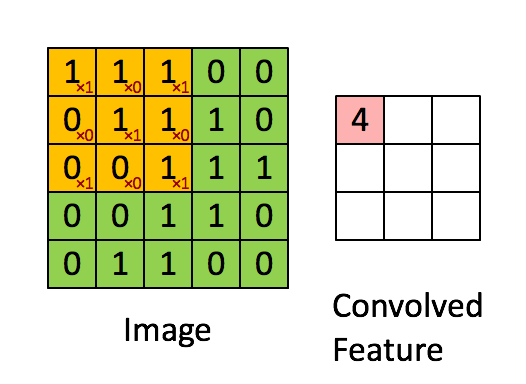

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
# Defining the input matrix as above using np.array function.
I = np.array([[1, 1, 1, 0, 0], [0, 1, 1, 1 ,0], [0, 0, 1, 1, 1,], [0, 0, 1, 1, 0], [0, 1, 1, 0, 0]])

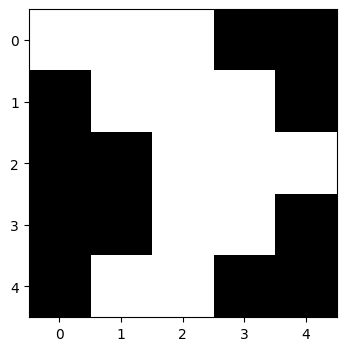

In [3]:
# Visualizing the input.
plt.imshow(I)

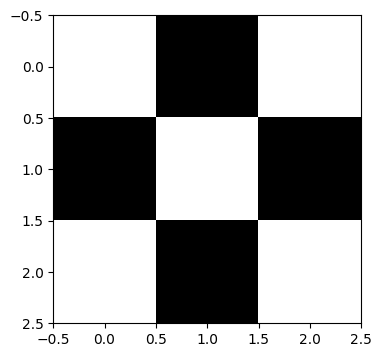

In [4]:
# Defining the input matrix as above using np.matrix function.
K = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
# Visualizing the Filter.
plt.imshow(K)


In [5]:
def convolution(img, filter):
    """
    Function performs convolution operations.
    Arguments:
    Inputs Arguments:
    img(nd array): numpy array of an input image.
    filter(nd array): numpy array of an input filter.
    Output Arguments:
    Filter_Map of Dimensions specified by eq(2).
    """
    # Get dimensions of input and filter
    img_height, img_width = img.shape
    filter_height, filter_width = filter.shape

    # Calculate output dimensions (using equation 2 with stride=1 and padding=0)
    output_dimension = img_height - filter_height + 1

    # Initialize output matrix
    filter_map = np.zeros(shape=(output_dimension, output_dimension))

    # Perform convolution operation
    for i in range(output_dimension):
        for j in range(output_dimension):
            # Element-wise multiplication and sum
            filter_map[i, j] = np.sum(img[i:i+filter_height, j:j+filter_width] * filter)

    return filter_map

In [6]:
img = convolution(I, K)

In [7]:
assert img.shape == (3, 3), " Convolution Operation did not produce correct output"

Test Passed


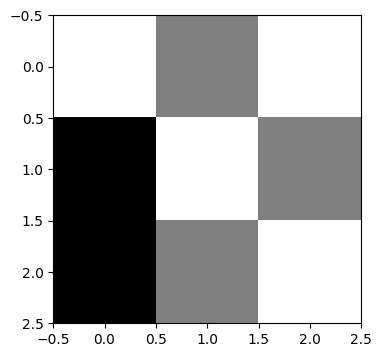

In [8]:
plt.imshow(img)
print("Test Passed")

# Section-2: In this section we will build very basic CNN architecture, Compile and train our CNN model.

This will be further divided into following sections:


## Section-2.1: Data Pre-processing.

Expected structure of folder:

-/Datasets/

      --train/
        -- acai/....     
        -- cupuacu/---
        -- all the classes--

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
data_dir = "/content/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train"

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [13]:
# Hyper-parameters:
batch_size = 32
img_height = 180
img_width = 180

### Load the Data:

We will use tf.keras.utility to load the image, for this function to work, your data should be in the structure suggested above.

We will do this for both training and validation dataset.

### Exercise:

1. To train a deep learning model we need to create a data pipeline, Multiple different approaches are available within keras framework;
one such framework is
  "tf.keras.utils.image_dataset_from_directory("parameter")

Implement above framework and explain the parameters you have used in the comment.

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [16]:
# Printing out number of Classes
class_names = train_ds.class_names
print(class_names)

['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


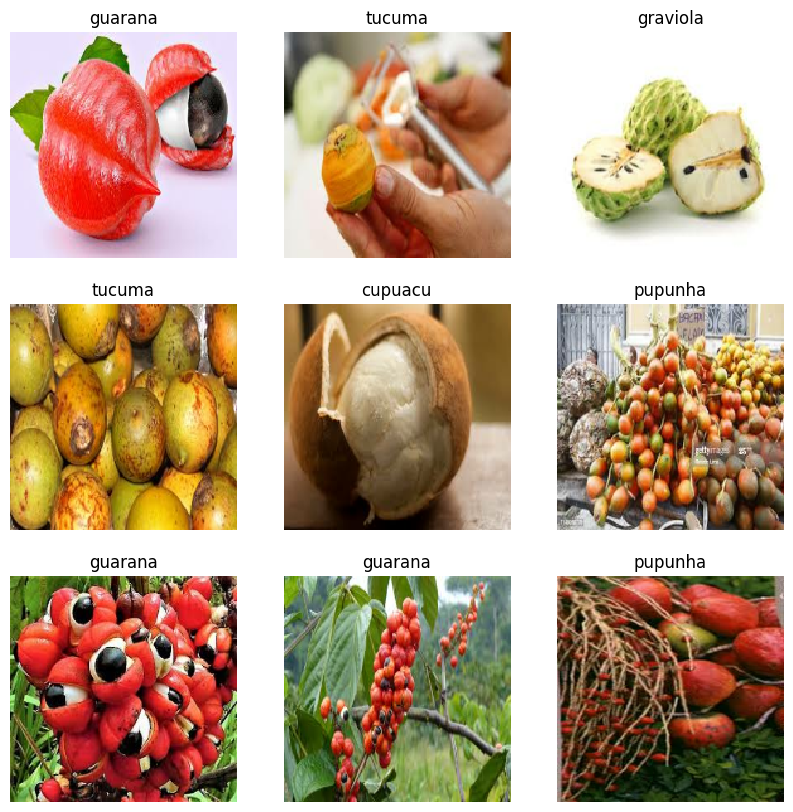

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(18, 180, 180, 3)
(18,)


## Design CNN Architecture:

For this task, we will build a CNN with following layers:

Feature-Extraction and Convolution Operations.
1.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
2.   Pooling layer[max, F=(2,2), S=2].
3.   Convolutional Layer [F=(3,3),K=16,P="same",S=1]-> Activation["ReLU"].
4.   Pooling layer[max, F=(2,2), S=2].

Classification-Assigning a class probabilities to each classes.
1.   Flatten Layer()
2.   Hidden/Dense Layer [number of neurons=128].
3.   Output Layer [number of neurons=num_classes].


### Exercise:

Please fill the hyper-parameters as defined above in the below layers.

In [19]:
def generate_model(image_height, image_width, nchannels, num_classes):
    """
    This function will generate a model with set of hyperparameters defined above.
    Input Args:
    image_height[int] = Height of an image.
    image_width[int] = Width of an image.
    nchannels[int] = Number of channels in image.
    num_classes[int] = Number of classes in dataset.
    Output Args:
    model-> A CNN model.
    """
    model = tf.keras.Sequential([
        # Rescaling and input layer
        layers.Rescaling(1./255, input_shape=(image_height, image_width, nchannels)),

        # First Block of Convolution and Pooling Operations.
        layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Second Block of Convolution and Pooling Operations.
        layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Fully connected classifier.
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
    ])
    return model

img_height = 180
img_width = 180

In [20]:
num_classes = len(class_names)
model = generate_model(img_height, img_width, 3, num_classes)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 16)          │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,147,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,150,870 (15.83 MB)

 Trainable params: 4,150,870 (15.83 MB)

 Non-trainable params: 0 (0.00 B)

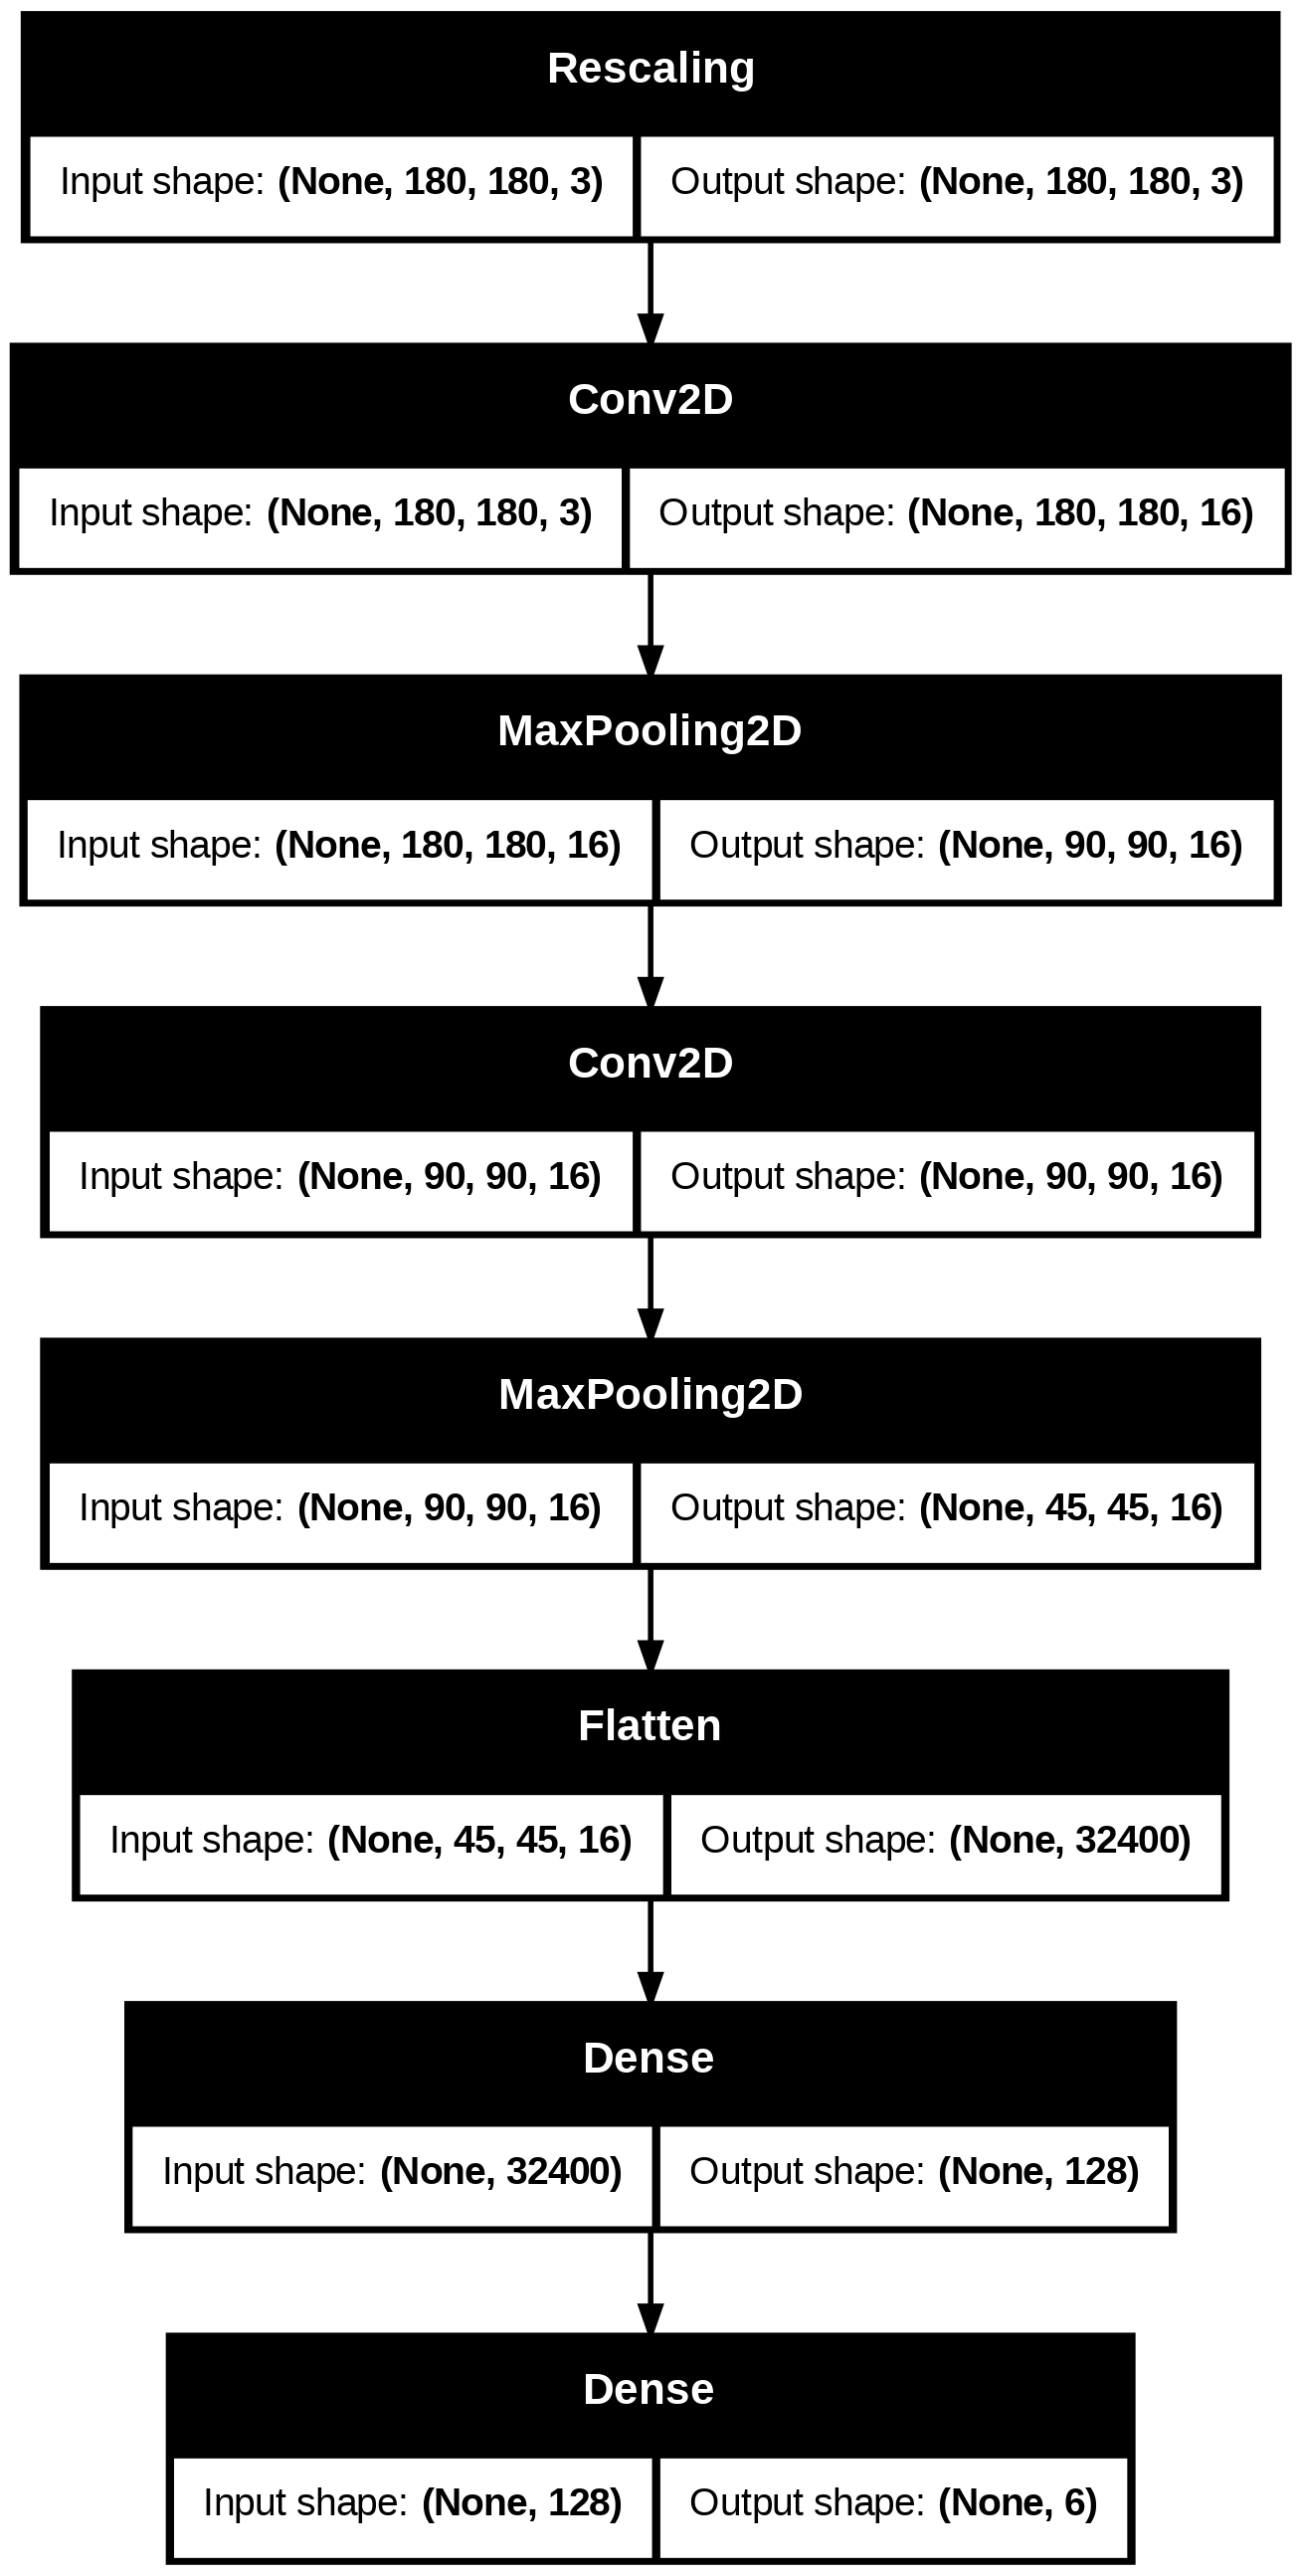

In [22]:
keras.utils.plot_model(model, show_shapes=True)

## Compile and Train Model.

Once we built the model, we need to compile the model before we start training.

In Model compilation, we do the following:
*   Checks for format Error.
*   Defines the loss function.
*   Defines the optimizer.
*   Defines the learning rate.
*   Defines the metrics we will be using.

For training our model we will be using:
*   loss --> SparseCategoricalCrossEntropy.
*   Optimizer --> Adam.
*   Evaluation Metric --> Accuracy.


In [23]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

### Train the Model.

For training a model with all the given hyper-parameters, and argumets we invoke fit methods.

It is a standard practise to return and hold record of losses values and metric values during training in variablel-history.

In [24]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1667 - loss: 1.7961 - val_accuracy: 0.2778 - val_loss: 2.7309
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2778 - loss: 2.7309 - val_accuracy: 0.5000 - val_loss: 2.4568
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 676ms/step - accuracy: 0.5000 - loss: 2.4568 - val_accuracy: 0.5556 - val_loss: 2.0477
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5556 - loss: 2.0477 - val_accuracy: 0.7222 - val_loss: 1.0033
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 736ms/step - accuracy: 0.7222 - loss: 1.0033 - val_accuracy: 1.0000 - val_loss: 0.4249
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step - accuracy: 1.0000 - loss: 0.4249 - val_accuracy: 0.8889 - val_loss: 0.3617
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 748ms/step - accuracy: 0.8889 - loss: 0.3617 - val_accuracy: 0.8889 - val_loss: 0.3769
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step - accuracy: 0.8889 - loss: 0.3769 - val_accuracy: 0.9444 - val_loss: 0.1780
E

## Observe the Model Performance.


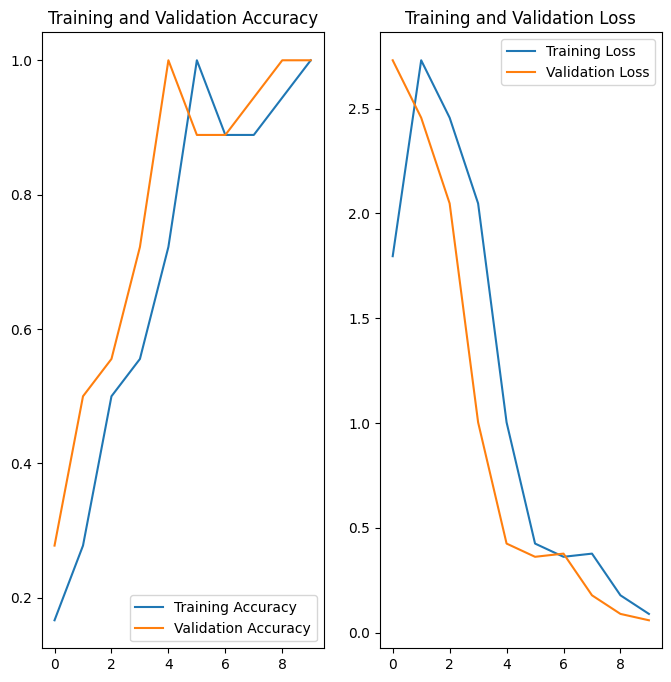

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Home Task:

Create a Test Set and Perform a model evaluation to find the test accuracy.

Based on last week built a function which predicts input examples, and also plot the result.


In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/FruitinAmazon.zip", 'r') as zip_ref:
  zip_ref.extractall('content/drive/MyDrive/FruitinAmazon')

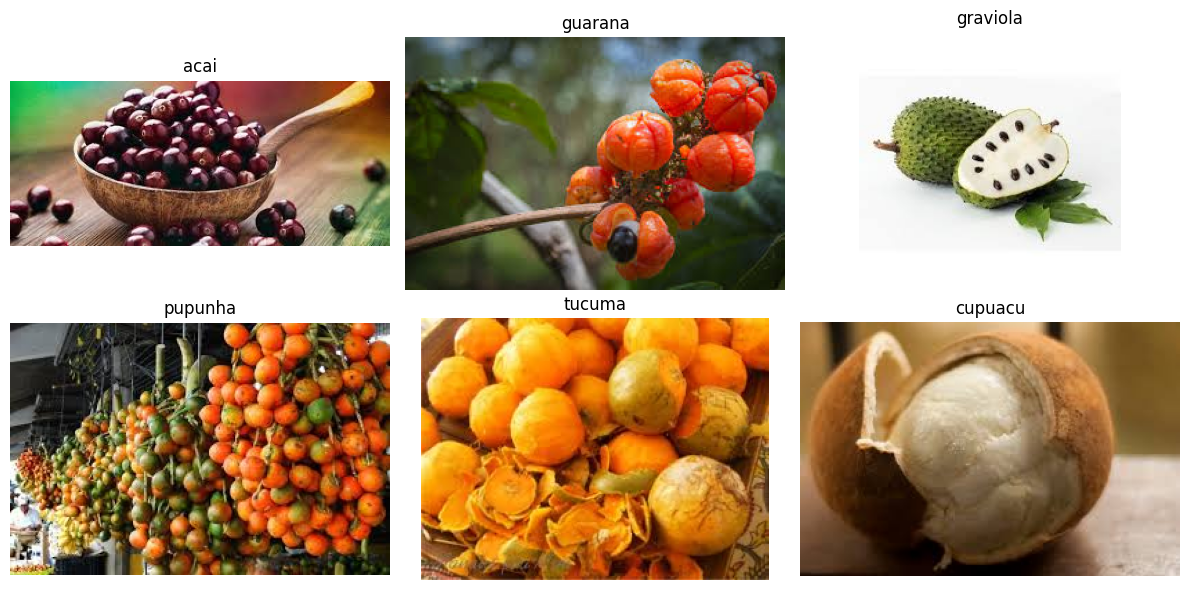

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to the train dataset
train_dir = "/content/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train"  # Update with your actual train folder path

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
image_paths = []
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    images = os.listdir(class_path)
    if images:  # Ensure the class directory has images
        image_paths.append(os.path.join(class_path, random.choice(images)))

# Display the images in a grid format (2 rows)
num_classes = len(image_paths)
fig, axes = plt.subplots(nrows=2, ncols=(num_classes + 1) // 2, figsize=(12, 6))

for ax, img_path, label in zip(axes.flatten(), image_paths, class_dirs):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.set_title(label)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
from PIL import Image

# List to store corrupted image paths
corrupted_images = []

# Iterate through each class subdirectory
for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)

    # Iterate through images in the class directory
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)

        try:
            # Attempt to open the image
            with Image.open(img_path) as img:
                img.verify()  # Verify image integrity

        except (IOError, SyntaxError):  # Catch corruption errors
            corrupted_images.append(img_path)
            os.remove(img_path)  # Remove corrupted image
            print(f"Removed corrupted image: {img_path}")

# Print final status
if not corrupted_images:
    print("No Corrupted Images Found.")
else:
    print(f"Total corrupted images removed: {len(corrupted_images)}")

No Corrupted Images Found.


In [ ]:
import tensorflow as tf

def load_and_preprocess_data(train_dir, img_height, img_width, batch_size, validation_split):
    rescale = tf.keras.layers.Rescaling(1./255)

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=True,
        validation_split=validation_split,
        subset='training',
        seed=123
    )

    train_ds = train_ds.map(lambda x, y: (rescale(x), y))

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        image_size=(img_height, img_width),
        interpolation='nearest',
        batch_size=batch_size,
        shuffle=False,
        validation_split=validation_split,
        subset='validation',
        seed=123
    )

    val_ds = val_ds.map(lambda x, y: (rescale(x), y))

    return train_ds, val_ds

# Example usage
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2
train_ds, val_ds = load_and_preprocess_data(train_dir, img_height, img_width, batch_size, validation_split)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
# Define number of classes (Update based on dataset)
num_classes = 6

# Build CNN model
model = keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), padding="same", strides=1, activation="relu", input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Convolutional Layer 2
    layers.Conv2D(32, (3, 3), padding="same", strides=1, activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2), strides=2),

    # Flatten Layer
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(64, activation="relu"),
    layers.Dense(128, activation="relu"),

    # Output Layer
    layers.Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(num_classes, input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example usage
num_classes = len(os.listdir(train_dir))  # Adjust based on your dataset
input_shape = (img_height, img_width, 3)
model = create_cnn_model(num_classes, input_shape)


In [ ]:
from tensorflow.keras import layers, models

def create_cnn_model(num_classes, input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Example usage
num_classes = len(os.listdir(train_dir))  # Adjust based on your dataset
input_shape = (img_height, img_width, 3)
model = create_cnn_model(num_classes, input_shape)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss'),
    EarlyStopping(patience=10, restore_best_weights=True)
]
history = model.fit(train_ds, epochs=250, validation_data=val_ds, callbacks=callbacks)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 674ms/step - accuracy: 0.1367 - loss: 4.2818 - val_accuracy: 0.0000e+00 - val_loss: 2.2535
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 974ms/step - accuracy: 0.2522 - loss: 2.0621 - val_accuracy: 0.8333 - val_loss: 0.7470
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 471ms/step - accuracy: 0.1871 - loss: 1.7846 - val_accuracy: 0.7222 - val_loss: 1.1146
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 475ms/step - accuracy: 0.3533 - loss: 1.5189 - val_accuracy: 0.6111 - val_loss: 1.4010
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 469ms/step - accuracy: 0.6220 - loss: 1.3653 - val_accuracy: 0.6667 - val_loss: 1.0383
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 456ms/step - accuracy: 0.4744 - loss: 1.2646 - val_accuracy: 0.6667 - val_loss: 0.9510
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 801ms/step - accuracy: 0.6055 - loss: 1.0182 - val_accuracy: 0.6667 - val_loss: 1.1010
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 721ms/step - accuracy: 0.8494 - loss: 0.8670 - val_accuracy: 0.8333

In [ ]:
import tensorflow as tf

# Define the rescale layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load and preprocess the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test',
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step - accuracy: 0.6000 - loss: 0.9885
Test accuracy: 0.6000


In [ ]:
# Train the Model
history = model.fit(
    train_ds,  # Training dataset (defined in Task 2)
    validation_data=val_ds,  # Validation dataset (defined in Task 2)
    epochs=250,  # Number of epochs
    batch_size=16,  # Batch size
    callbacks=callbacks,  # Callbacks for checkpointing and early stopping
    verbose=1  # Show progress during training
)

# Print the final accuracy and loss
print("Training finished.")

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - accuracy: 1.0000 - loss: 0.0171 - val_accuracy: 0.8889 - val_loss: 0.3023
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 1.0000 - loss: 0.0101 - val_accuracy: 0.8889 - val_loss: 0.3750
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 449ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 0.8889 - val_loss: 0.3119
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 740ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.8889 - val_loss: 0.2623
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 711ms/step - accuracy: 1.0000 - loss: 0.0223 - val_accuracy: 0.8333 - val_loss: 0.4136
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 459ms/step - accuracy: 1.0000 - loss: 0.0098 - val_accuracy: 0.8333 - val_loss: 0.5989
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 456ms/step - accuracy: 1.0000 - loss: 0.0094 - val_accuracy: 0.8889 - val_loss: 0.3905
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 460ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 0.8333 - v

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = '/content/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test'

# Initialize ImageDataGenerator for test data (no data augmentation during testing)
test_datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values

# Create test dataset from the directory
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Resize images to match the input shape of the model
    batch_size=16,  # Batch size
    class_mode='sparse',  # Use sparse mode since you're using sparse_categorical_crossentropy
    shuffle=False  # Don't shuffle during evaluation
)

Found 30 images belonging to 6 classes.


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2/2 - 0s - 122ms/step - accuracy: 0.6000 - loss: 1.1167
Test Loss: 1.1167371273040771
Test Accuracy: 0.6000000238418579


In [ ]:
import tensorflow as tf

# Define the rescale layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load and preprocess the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test',
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False
)

# Apply the normalization (Rescaling) to the test dataset
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.6000 - loss: 1.1124
Test accuracy: 0.6000


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Create test dataset from the directory
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Resize images to match the input shape of the model
    batch_size=16,  # Batch size
    class_mode='sparse',  # Use sparse mode since you're using sparse_categorical_crossentropy
    shuffle=False  # Don't shuffle during evaluation
)

Found 30 images belonging to 6 classes.


In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds, verbose=2)

# Print the evaluation results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

2/2 - 0s - 157ms/step - accuracy: 0.6000 - loss: 1.1167
Test Loss: 1.1167371273040771
Test Accuracy: 0.6000000238418579
